In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os.path

folder_paths = ["DeeperNetv1", "DeeperNetv2", "BaseNetv1", "BaseNetv2"]
#folder_paths = ["BaseNetv1", "BaseNetv1-2"]
#folder_paths = ["BaseNetv1", "BaseNetv2"]
#folder_paths = ["DeeperNetv1", "DeeperNetv2"]
file_type = '\*csv'

# read in multiple dataframes to compare
dataframes = {}

for path in folder_paths:
    files = glob.glob(path + file_type)
    files.sort(key=os.path.getmtime)

    data = pd.DataFrame()
    for file in files:
        data = pd.concat([data, pd.read_csv(file)], ignore_index=True)

    # due to a bug in the data collection, there can be duplicate records, so they are dropped
    data = data.drop_duplicates().reset_index(drop=True)

    # time can go negative if time runs out, so clean data to reflect 0 = no time left
    data['time'] = data['time'].apply(lambda x: 0 if x < 0 else x)
    dataframes[path] = data

minim = 1e10
for key, data in dataframes.items():
    if len(data) < minim:
        minim = len(data)

for key, data in dataframes.items():
    dataframes[key] = data[:minim]

# Summary Plots
The plots below provide an overview to the models performance during the last training session. It will show a graph for the collected statistics with a graph of the score for easy viewing. Most of these are action counts, which may show correlations between certain actions resulting in a higher score.

In [297]:
plt.rcParams["figure.figsize"] = (20,10)
colors = ['b', 'xkcd:gold', 'g', 'r']
#colors = ['g', 'tab:brown']
COLOR_START = 0

for key, data in dataframes.items():
    print(key)
    print(data[data['score'] > 0].describe())

DeeperNetv1
           kills  time  health       score   movement     rotate      shoot  \
count  26.000000  26.0    26.0   26.000000  26.000000  26.000000  26.000000   
mean    1.384615   0.0   100.0  103.343886  77.153846  69.692308  20.461538   
std     0.697247   0.0     0.0   51.088417   6.398077   6.392303   3.786616   
min     1.000000   0.0   100.0   57.880985  65.000000  55.000000  14.000000   
25%     1.000000   0.0   100.0   73.475874  73.250000  65.250000  17.250000   
50%     1.000000   0.0   100.0   84.686974  76.500000  70.000000  21.000000   
75%     1.750000   0.0   100.0  124.776855  80.250000  72.750000  23.000000   
max     3.000000   0.0   100.0  245.487915  94.000000  84.000000  27.000000   

             reward  
count     26.000000  
mean  -14023.807692  
std    12972.791194  
min   -71926.000000  
25%   -13818.500000  
50%   -11761.000000  
75%    -8216.500000  
max    -3192.000000  
DeeperNetv2
           kills  time  health       score   movement     rotate  

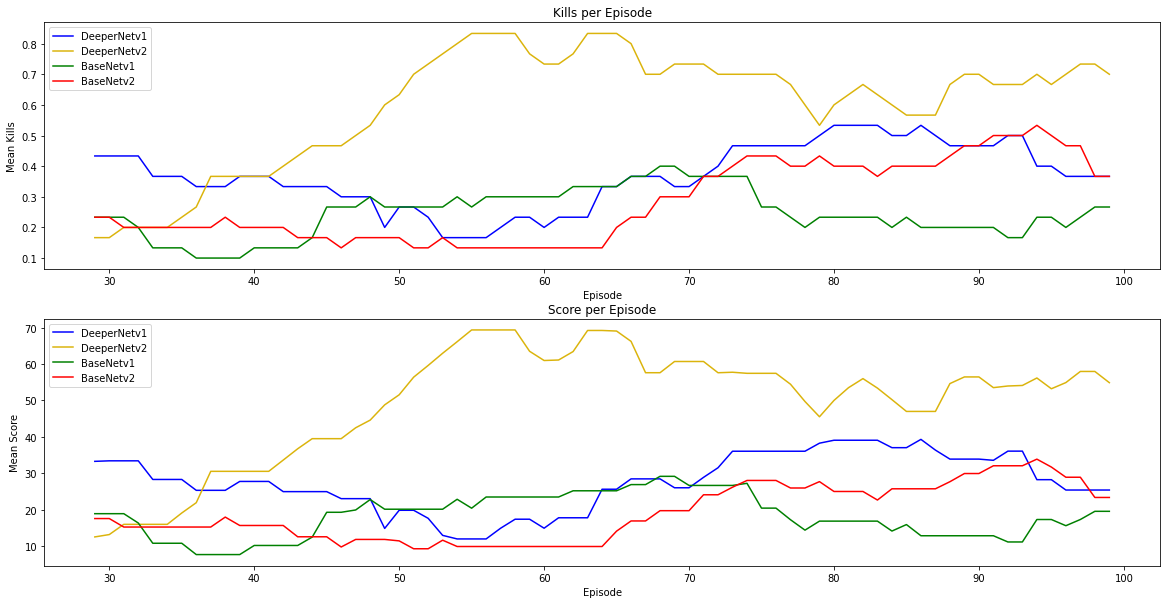

In [285]:
plt.subplot(2, 1, 1)
plt.title("Kills per Episode")
plt.ylabel('Mean Kills')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['kills'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Score per Episode")
plt.ylabel('Mean Score')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['score'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()
plt.show()

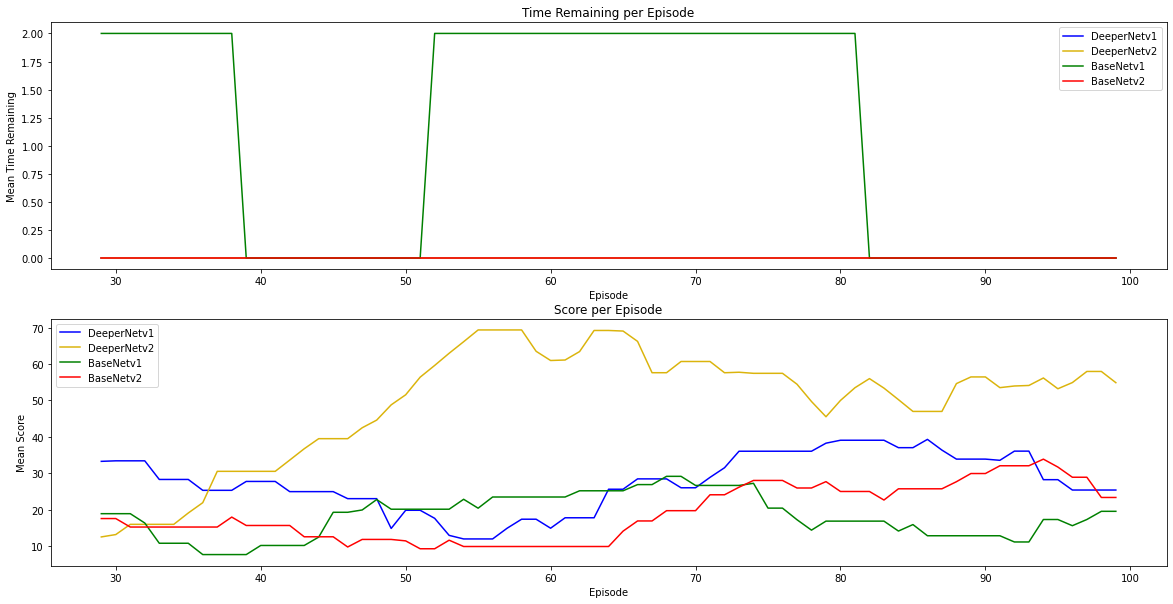

In [286]:
plt.subplot(2, 1, 1)
plt.title("Time Remaining per Episode")
plt.ylabel('Mean Time Remaining')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['time'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Score per Episode")
plt.ylabel('Mean Score')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['score'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()
plt.show()

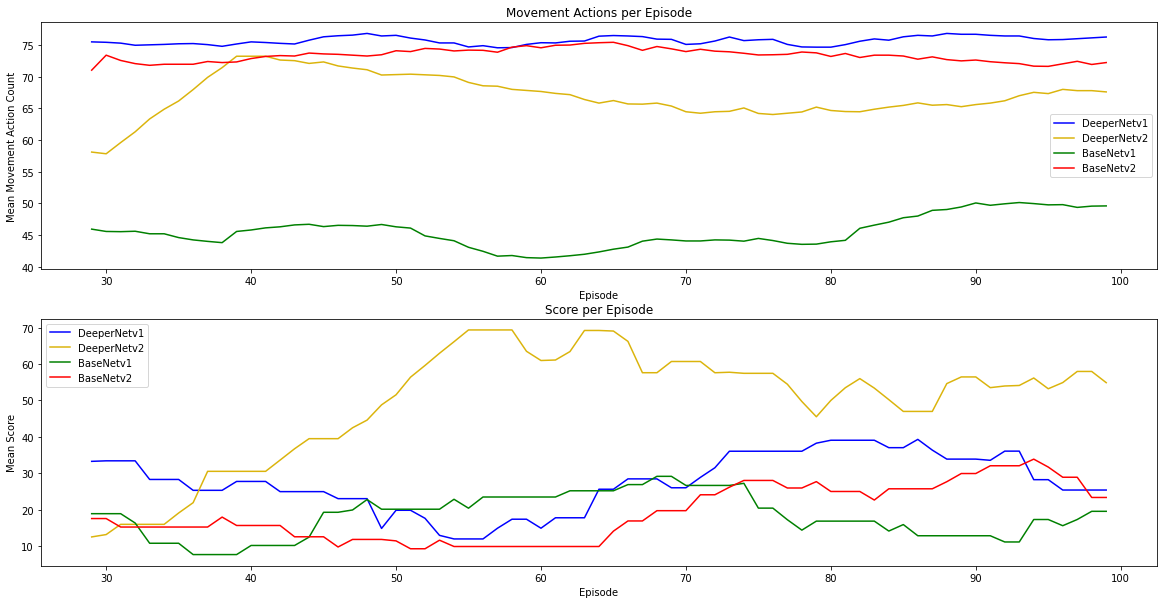

In [287]:
plt.subplot(2, 1, 1)
plt.title("Movement Actions per Episode")
plt.ylabel('Mean Movement Action Count')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['movement'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Score per Episode")
plt.ylabel('Mean Score')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['score'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()
plt.show()

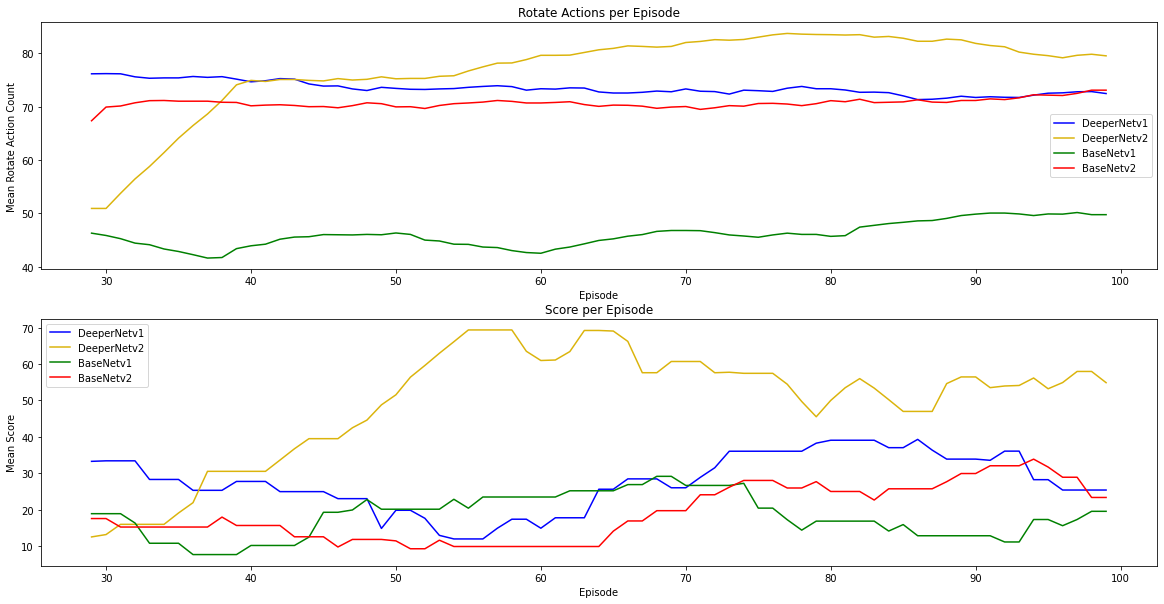

In [288]:
plt.subplot(2, 1, 1)
plt.title("Rotate Actions per Episode")
plt.ylabel('Mean Rotate Action Count')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['rotate'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Score per Episode")
plt.ylabel('Mean Score')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['score'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()
plt.show()

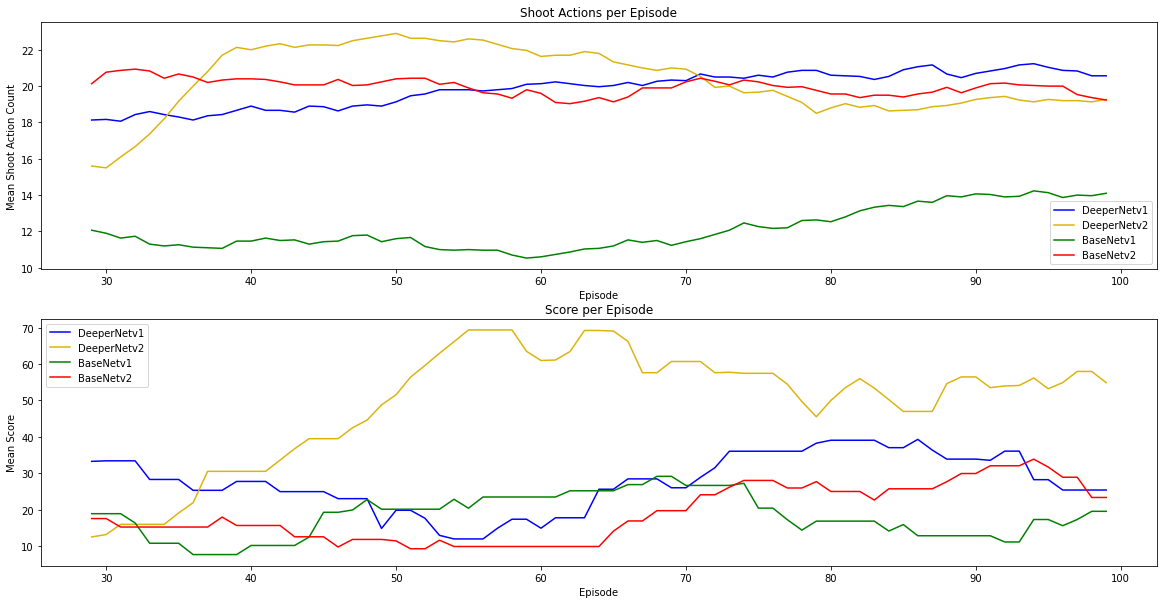

In [289]:
plt.subplot(2, 1, 1)
plt.title("Shoot Actions per Episode")
plt.ylabel('Mean Shoot Action Count')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['shoot'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Score per Episode")
plt.ylabel('Mean Score')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['score'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()
plt.show()

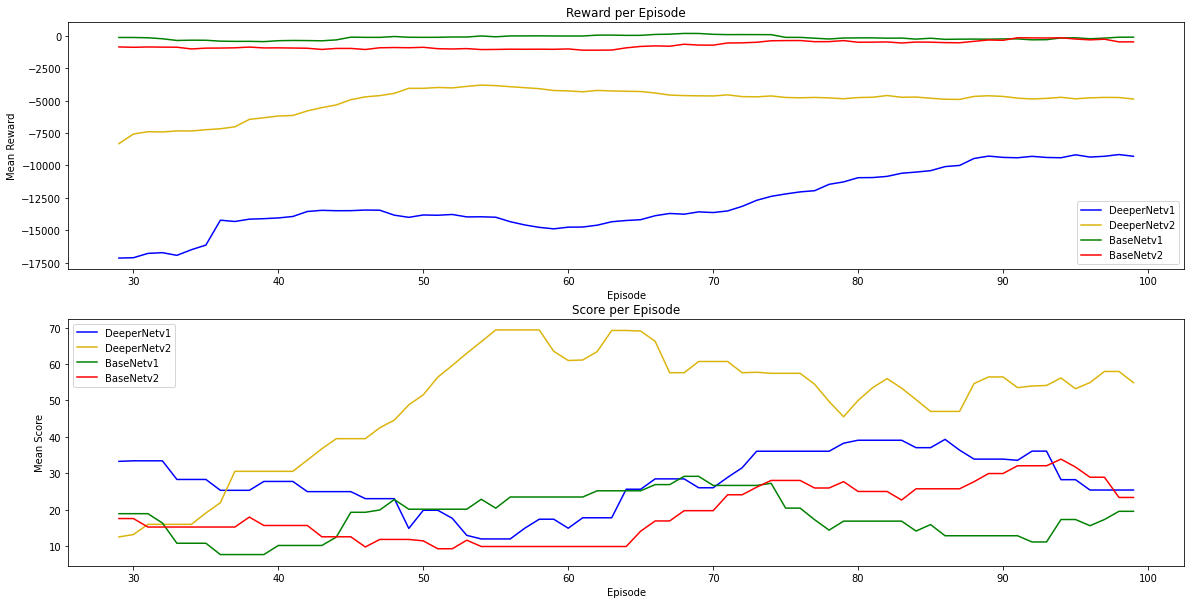

In [290]:
plt.subplot(2, 1, 1)
plt.title("Reward per Episode")
plt.ylabel('Mean Reward')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['reward'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Score per Episode")
plt.ylabel('Mean Score')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['score'].rolling(window=30).mean(), label=key, color=colors[count])
    count += 1
plt.legend()
plt.show()

# Frequency Plots
The graphs above are great for showing certain actions and detailed improvements. However, to see if there is any baseline improvement frequency plots can be employed. These plots will reveal if a model is getting more consistent by showing if it at least gets a single kill or scores. 

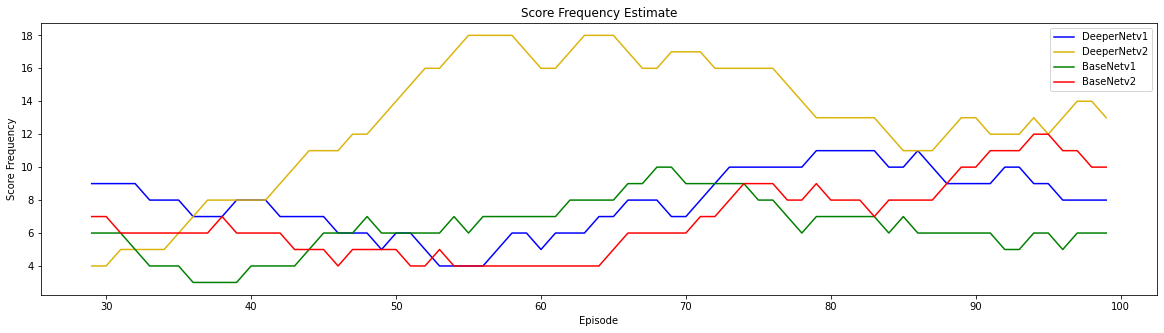

In [291]:
# lambda function for getting frequency of elements > 0
gt_zero = lambda x: sum([0 if i <= 0 else 1 for i in x])

# lambda function for getting frequency of elements > 1
gt_one = lambda x: sum([0 if i <= 1 else 1 for i in x])

plt.rcParams["figure.figsize"] = (20,5)

plt.title("Score Frequency Estimate")
plt.ylabel('Score Frequency')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['score'].rolling(window=30).apply(gt_zero), label=key, color=colors[count])
    count += 1
plt.legend()
plt.show()

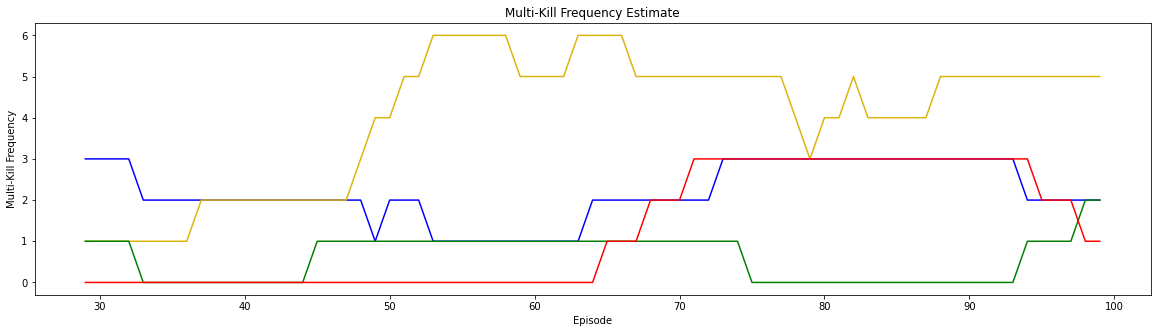

In [292]:
plt.title("Multi-Kill Frequency Estimate")
plt.ylabel('Multi-Kill Frequency')
plt.xlabel('Episode')
count = COLOR_START
for key, data in dataframes.items():
    plt.plot(data.index, data['kills'].rolling(window=30).apply(gt_one), label=key, color=colors[count])
    count += 1

plt.show()